In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams
from mpl_toolkits.axes_grid1 import make_axes_locatable

import scipy.stats as ss

import sys
sys.path.insert(0, '../util/')
from util_os import util_os

In [2]:
datapath = '/home/jw1624/H1-merian/csvs/breathingModes_clean/'

## Set params

In [3]:
cdmgals = util_os.getGalaxies()[0]

In [4]:
rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
   

In [5]:
matplotlib.rc('font', family='serif')
rcParams['axes.linewidth'] = 3
rcParams['xtick.major.width'] = 3
rcParams['xtick.major.size'] = 12
rcParams['ytick.major.width'] = 3
rcParams['ytick.major.size'] = 12

rcParams['xtick.minor.width'] = 2
rcParams['xtick.minor.size'] = 8
rcParams['ytick.minor.width'] = 2
rcParams['ytick.minor.size'] = 8

rcParams['font.family'] = 'serif'

rcParams['text.usetex'] = False

rcParams['savefig.bbox'] = 'tight'
rcParams['savefig.transparent'] = False

# Individual Galaxy Figures

## Three Panel Figure
R_hm, sSFR and sigma as functions of time

In [6]:
cdmgals

array([431, 442, 468, 492, 502, 515, 523, 556, 568, 569, 571, 597, 613,
       615, 618, 634])

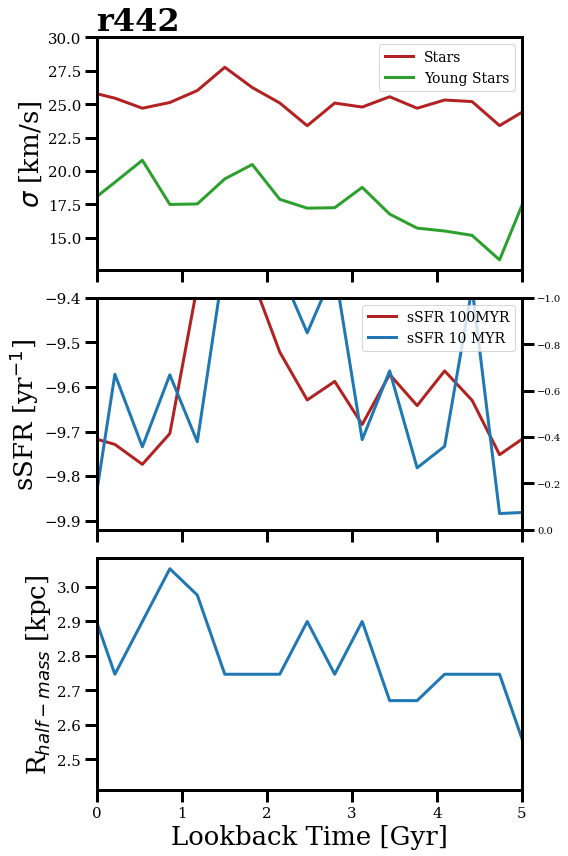

In [7]:
gal = cdmgals[1]
tlim = 5

data = pd.read_csv(datapath+'r'+str(gal)+'_qtys.txt')

fig, axs = plt.subplots(3,1, facecolor='w', figsize=(8,12), sharex=True)

axs[0].set_title('r'+str(gal), fontsize=32, weight='bold', loc='left')

# get lookback time 
tlookback = abs(data['t'] - max(data['t']))

tmask = tlookback<tlim+1

# top panel: sigma
sigAS = data['sigma_allstars'][tmask]
sigASw= data['sigma_allstars_wtd'][tmask]

sigYS = data['sigma_youngstar'][tmask]
sigYSw= data['sigma_youngstar_wtd'][tmask]

sigCG = data['sigma_coldgas'][tmask]
sigCGw= data['sigma_coldgas_wtd'][tmask] 

axs[0].plot(tlookback[tmask], sigASw,linewidth=3, color='firebrick')
axs[0].plot(tlookback[tmask], sigYSw,linewidth=3, color='tab:green')
#axs[0].plot(tlookback[tmask], sigCGw,linewidth=3, color='tab:blue')

axs[0].tick_params(axis='both', which='major', labelsize=15)
axs[0].set_ylabel(r'$\sigma$ [km/s]', fontsize=26)
axs[0].legend(['Stars', 'Young Stars', 'Cold Gas'], fontsize=14, loc=1)
axs[0].set_xlim([0,tlim])

# middle panel: sSFR
ssfr10 = data['sSFR_10'][tmask]
ssfr100= data['sSFR_100'][tmask]

axs[1].plot(tlookback[tmask], ssfr100, color='firebrick', linewidth=3)
axs[1].plot(tlookback[tmask], ssfr10, color='tab:blue', linewidth=3)

axs[1].tick_params(axis='both', which='major', labelsize=15)    
axs[1].set_ylabel(r'sSFR [yr$^{-1}$]', fontsize=26)
axs[1].legend(['sSFR 100MYR', 'sSFR 10 MYR'], fontsize=14, loc=1)

# adding alpha to middle panel 
axalpha = axs[1].twinx() 
axalpha.plot(tlookback[tmask], data['alpha'][tmask], c='k')

axalpha.set_ylim([0,-1])

# Bottom panel: half-mass radius
Rhm = data['R_halfmass'][tmask]
Rhls= data['R_halflight_s'][tmask]
Rhlc= data['R_halflight_c'][tmask]

axs[2].plot(tlookback[tmask], Rhm, linewidth=3)
#axs[2].plot(tlookback[tmask], Rhls, linewidth=1, marker='^')
#axs[2].plot(tlookback[tmask], Rhlc, linewidth=1, marker='^')

axs[2].tick_params(axis='both', which='major', labelsize=15)
axs[2].set_ylabel(r'R$_{half-mass}$ [kpc]', fontsize=26)
axs[2].set_xlabel('Lookback Time [Gyr]', fontsize=26)

##
axs[0].set_ylim(top=30)
axs[1].set_ylim(top=-9.4)
#axs[2].set_ylim(top=17)

plt.tight_layout()

#plt.savefig('../figures/breathingModes/threePanel/r'+str(gal)+'_t'+str(tlim)+'.png')

## Scatter sSFR and sigma; sSFR and Rhm

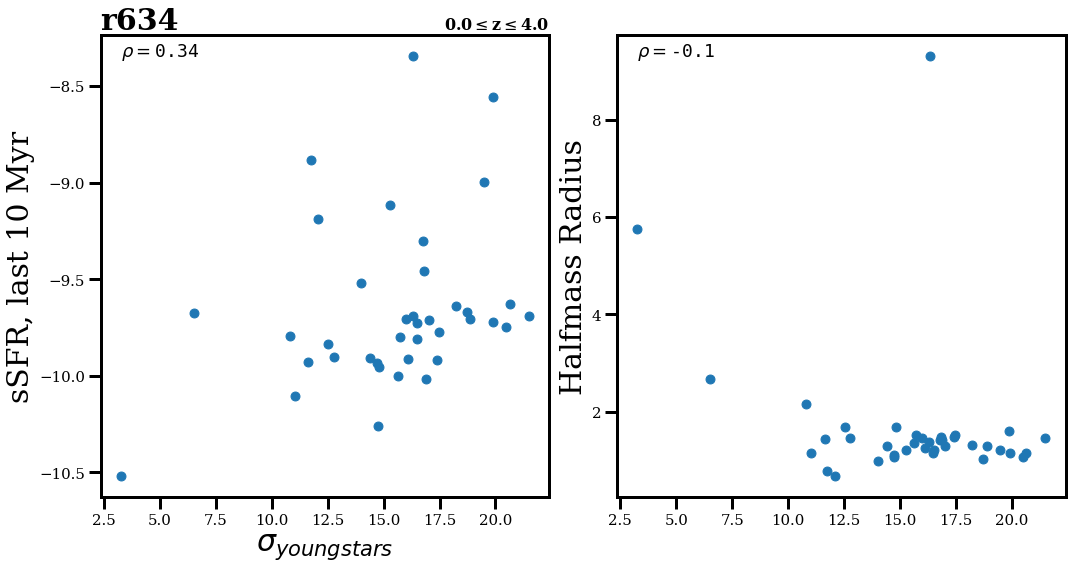

In [20]:
gal = cdmgals[15]
zmin = 0.0
zmax = 4.0

fig, axs = plt.subplots(1,2, figsize=(15,8), facecolor='w')

axs[0].tick_params(axis='both', which='major', labelsize=15)
axs[1].tick_params(axis='both', which='major', labelsize=15)

data = pd.read_csv(datapath+'r'+str(gal)+'_qtys.txt')
zmaskmin = data['z']>=zmin

x = data['sigma_youngstar'][zmaskmin]
yl = data['sSFR_10'][zmaskmin]
yr = data['R_halfmass'][zmaskmin]
c = data['z'][zmaskmin]

zmaskmax = c<=zmax
x = x[zmaskmax]
yl = yl[zmaskmax]
yr = yr[zmaskmax]
c = c[zmaskmax]

rsl = ss.spearmanr(x,yl)[0]
rsr = ss.spearmanr(x,yr)[0]

axs[0].scatter(x, yl, s=80)

axs[0].set_title('r'+str(gal), fontsize=30, weight='bold', loc='left')
axs[0].set_title(str(zmin)[:3]+r'$\leq$z$\leq$'+str(zmax)[:3], fontsize=16, weight='bold', loc='right')

axs[0].set_xlabel(r'$\sigma_{youngstars}$', fontsize=30)
axs[0].set_ylabel('sSFR, last 10 Myr', fontsize=30)

axs[0].text(s=r'$\rho=$'+str(rsl)[:4], x=min(x)-0.0, y=max(yl)-0.00, fontsize=18, fontfamily='monospace')

# right 
axs[1].scatter(x, yr, s=80)

axs[1].set_ylabel('Halfmass Radius', fontsize=30)

axs[1].text(s=r'$\rho=$'+str(rsr)[:4], x=min(x)-0.0, y=max(yr)-0.00, fontsize=18, fontfamily='monospace')

plt.tight_layout()

ff = '../figures/breathingModes/ssfr10_SigYS_indiv/'+str(zmin)[:3]+'z'+str(zmax)[:3]+'_r'+str(gal)+'.png'
#plt.savefig(ff)

# Group Figures

## Scatter sSFR_100 and log10 R_halfmass (population)

Text(-10.339361095292167, 1.6713651894877364, '$\\rho=$-0.084')

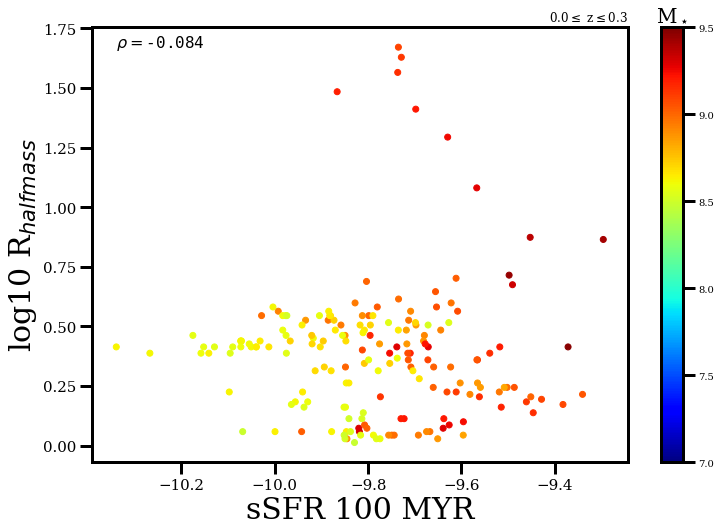

In [36]:
zmin = 0.0
zmax = 0.3

fig = plt.figure(figsize=(12,8), facecolor='w')
xall = []
yall = []
call = []

for idx,gal in enumerate(cdmgals):
    if idx==1: continue
    
    data = pd.read_csv(datapath+'r'+str(gal)+'_qtys.txt')

    x = data['sSFR_100'][data['z'] <= zmax].to_numpy()
    y = np.log10(data['R_halfmass'][data['z'] <= zmax]).to_numpy()
    c = np.log10(data['M_star'][data['z'] <= zmax].to_numpy())
    
    x = x[c>=zmin]
    y = y[c>=zmin]
    c = c[c>=zmin]
    
    for i,_ in enumerate(x):
        xall.append(x[i])
        yall.append(y[i])
        call.append(c[i])
    
rs = ss.spearmanr(xall,yall)[0]

plt.scatter(xall, yall, c=call, cmap='jet', clim = [7.0,9.5])

plt.tick_params(axis='both', which='major', labelsize=15)    

plt.title(str(zmin)+r'$\leq$ z$\leq$'+str(zmax), loc='right')
plt.xlabel('sSFR 100 MYR', fontsize=30)
plt.ylabel(r'log10 R$_{halfmass}$', fontsize=30)

#plt.ylim([3,4.5])
#plt.xlim([0.0,0.4])

clb = plt.colorbar()
clb.ax.set_title(r'M$_\star$', fontsize=20)

plt.text(x= min(xall), y=max(yall),s=r'$\rho=$'+str(rs)[:6], fontsize=16, fontfamily='monospace')

#plt.savefig('../figures/breathingModes/ssfr100_Rhl/z'+str(zmax)+'_double.png')

## sigma and sSFR

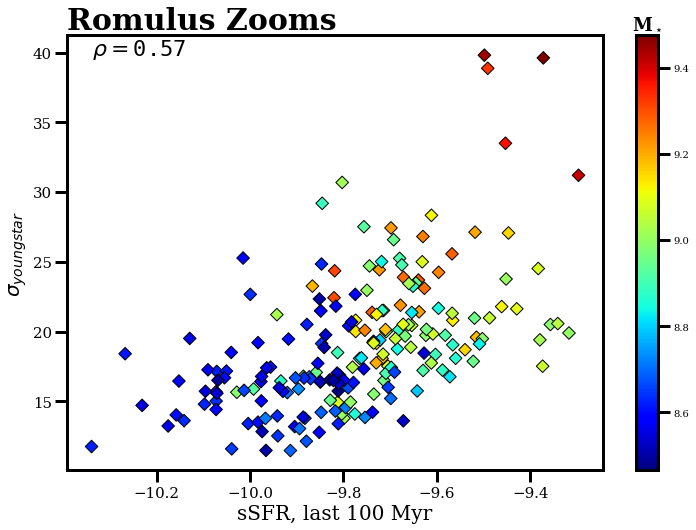

In [48]:
zmin = 0.00
zmax = 0.35

mmin = 6
mmax = 12
fig = plt.figure(facecolor='w', figsize=(12,8))

plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=13)

# get data
sigGas = []
ssfr = []
mall = []
for idx,gal in enumerate(cdmgals):
    data = pd.read_csv(datapath+'r'+str(gal)+'_qtys.txt')

    x = data['sSFR_100'][data['z'] <= zmax].to_numpy()
    y = data['sigma_youngstar'][data['z'] <= zmax].to_numpy()
    c = np.log10(data['M_star'][data['z'] <= zmax].to_numpy())
    z = data['z'][data['z']<= zmax].to_numpy()
    
    x = x[z>=zmin]
    y = y[z>=zmin]
    c = c[z>=zmin]
    
    x = x[c>=mmin]
    y = y[c>=mmin]
    c = c[c>=mmin]
    
    x = x[c<=mmax]
    y = y[c<=mmax]
    c = c[c<=mmax]
    
    for i,_ in enumerate(x):
        sigGas.append(x[i])
        ssfr.append(y[i])
        mall.append(c[i])
        
rs = ss.spearmanr(sigGas, ssfr)[0]
        
# scatter 
plt.scatter(sigGas, ssfr, c=mall, cmap='jet', s=80, ec='k', marker='D')

plt.xlabel('sSFR, last 100 Myr', fontsize=20)
plt.ylabel(r'$\sigma_{youngstar}$', fontsize=20)

#plt.xscale('log')

clb = plt.colorbar()
clb.ax.set_title(r'M$_\star$', fontsize=18, weight='bold')

plt.title('Romulus Zooms', fontsize=30, weight='bold', loc='left')
#plt.title(str(mmin)+r'$\leq$M$_\star\leq$'+str(mmax), fontsize=22, weight='bold', loc='right')

plt.text(x=min(sigGas), y=max(ssfr), s=r'$\rho=$'+str(rs)[:4], fontsize=22, fontfamily='monospace')

ff = '../figures/breathingModes/ssfr100_SigYS_group/'+str(zmin)[:3]+'z'+str(zmax)[:3]+'.png'
#plt.savefig(ff)

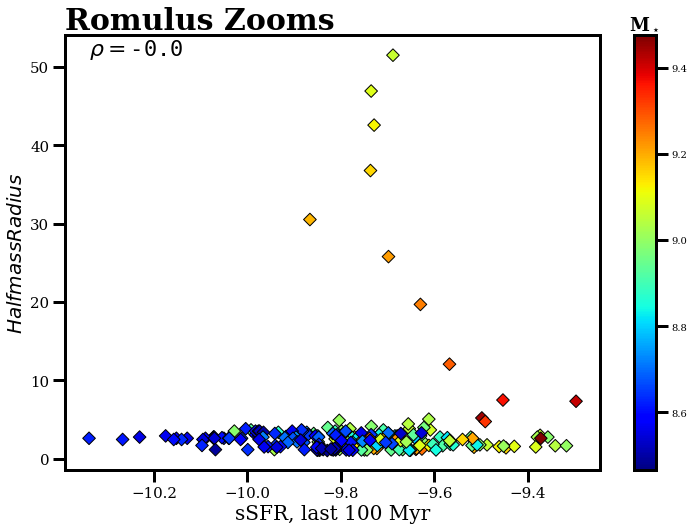

In [49]:
zmin = 0.00
zmax = 0.35

mmin = 6
mmax = 12
fig = plt.figure(facecolor='w', figsize=(12,8))

plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=13)

# get data
sigGas = []
ssfr = []
mall = []
for idx,gal in enumerate(cdmgals):
    data = pd.read_csv(datapath+'r'+str(gal)+'_qtys.txt')

    x = data['sSFR_100'][data['z'] <= zmax].to_numpy()
    y = data['R_halfmass'][data['z'] <= zmax].to_numpy()
    c = np.log10(data['M_star'][data['z'] <= zmax].to_numpy())
    z = data['z'][data['z']<= zmax].to_numpy()
    
    x = x[z>=zmin]
    y = y[z>=zmin]
    c = c[z>=zmin]
    
    x = x[c>=mmin]
    y = y[c>=mmin]
    c = c[c>=mmin]
    
    x = x[c<=mmax]
    y = y[c<=mmax]
    c = c[c<=mmax]
    
    for i,_ in enumerate(x):
        sigGas.append(x[i])
        ssfr.append(y[i])
        mall.append(c[i])
        
rs = ss.spearmanr(sigGas, ssfr)[0]
        
# scatter 
plt.scatter(sigGas, ssfr, c=mall, cmap='jet', s=80, ec='k', marker='D')

plt.xlabel('sSFR, last 100 Myr', fontsize=20)
plt.ylabel(r'Halfmass Radius', fontsize=20)

#plt.xscale('log')

clb = plt.colorbar()
clb.ax.set_title(r'M$_\star$', fontsize=18, weight='bold')

plt.title('Romulus Zooms', fontsize=30, weight='bold', loc='left')
#plt.title(str(mmin)+r'$\leq$M$_\star\leq$'+str(mmax), fontsize=22, weight='bold', loc='right')

plt.text(x=min(sigGas), y=max(ssfr), s=r'$\rho=$'+str(rs)[:4], fontsize=22, fontfamily='monospace')

ff = '../figures/breathingModes/ssfr100_SigYS_group/'+str(zmin)[:3]+'z'+str(zmax)[:3]+'.png'
#plt.savefig(ff)

## Plotting Several V_disp definitions
Alyson mentioned that the vdisp for young stars we are seeing is higher than she would have hoped

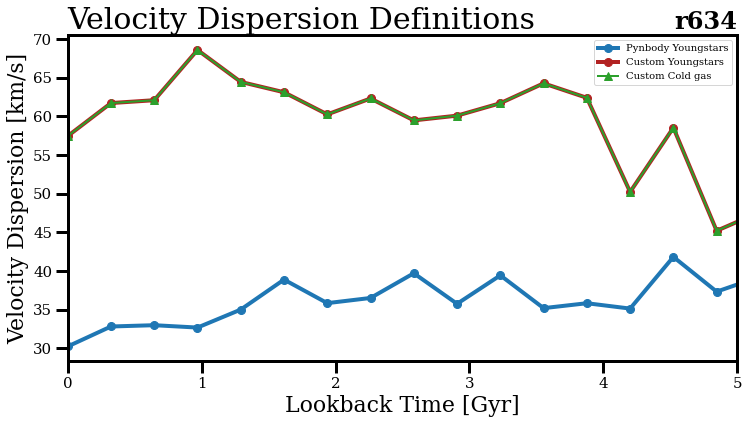

In [62]:
gal = cdmgals[15]
tlim = 5

# acquire data
data = pd.read_csv(datapath+'r'+str(gal)+'_qtys.txt')
tlookback = max(data['t']) - data['t']
tmask = tlookback<tlim+1

sigma_youngstar_pynbody = data['sigma_youngstar'][tmask]
sigma_youngstar_m = data['sigma_youngstar_m'][tmask]
sigma_coldgas = data['sigma_youngstar_m'][tmask]

tlookback = tlookback[tmask]

# set up figure 
fig = plt.figure(figsize=(12,6), facecolor='w')

# plot 
plt.plot(tlookback, sigma_youngstar_pynbody, linewidth=4, marker='o', markersize=8)
plt.plot(tlookback, sigma_youngstar_m, linewidth=4, marker='o', markersize=8, c='firebrick')
plt.plot(tlookback, sigma_coldgas, linewidth=2, marker='^', markersize=8, c='tab:green')

# prettify 
plt.tick_params(axis='both', which='major', labelsize=15)

plt.xlabel('Lookback Time [Gyr]', fontsize=22)
plt.ylabel('Velocity Dispersion [km/s]', fontsize=22)

plt.title('Velocity Dispersion Definitions', fontsize=30, loc='left')
plt.title('r'+str(gal), weight='bold', fontsize=24, loc='right')

plt.legend(['Pynbody Youngstars', 'Custom Youngstars', 'Custom Cold gas'])

plt.xlim([0,tlim])

plt.savefig('../figures/breathingModes/vdispDefns/r'+str(gal)+'.png')